In [10]:
%autosave 60

Autosaving every 60 seconds


In [11]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import json
import matplotlib.pyplot as plt

In [12]:
plt.rcParams["figure.facecolor"] = "#f8f7ff"
plt.rcParams["axes.facecolor"] = "#f8f7ff"
plt.rcParams['savefig.facecolor'] = "#f8f7ff"

In [13]:
colors = ['#ffeedd', '#b8b8ff']
colors_points = ['#FDF5DF', '#CEB4FA']
positions = [0, 1]

cmap = LinearSegmentedColormap.from_list("CustomGradient_1", list(zip(positions, colors)))
cmap_points = LinearSegmentedColormap.from_list("CustomGradient_2", list(zip(positions, colors_points)))

In [14]:
res = {
    "ансамблирование\nодного вида бустинга": [
        64906, 64604, 64646, 65232, 65288, 65291, 65171, 65268, 65125
    ],
    "ансамблирование\nразных бустингов": [
        65281, 64674, 65263, 65302, 65283, 65237, 65139
    ],
    "ансамблирование\nмоделей разного типа": [
        62165, 64720, 65204, 65307, 65229, 65036
    ],
    "MLPClassifier\n простой fit predict": [
        65007
    ],
    "RandomForestClassifier\n простой fit predict": [
        62498, 61294, 60281, 62514
    ],
    "LGBMClassifier\n простой fit predict": [
        62699, 64873
    ],
    "LGBMClassifier\n простой fit predict_proba": [
        65257, 61093
    ],
    "CatBoostClassifier\n простой fit predict": [
        64613, 64301, 65168, 64570, 63714, 65186, 65208, 63073, 62535, 60968, 63429, 64152
    ],
    "CatBoostClassifier\n простой fit predict_proba": [
        65222, 64791, 64963, 65176, 65274
    ],
    "LightAutoML": [
        65032, 65249, 64766, 65182, 65302, 65249
    ],
    "XGBClassifier\n простой fit predict": [
        61013, 65219, 60930
    ],
    "AdaBoostClassifier\n простой fit predict": [
        63964, 64514
    ]
}
res = [(k, np.array(v) / 100000) for k, v in res.items()]
res = sorted(res, key=lambda x: x[1].mean(), reverse=True)

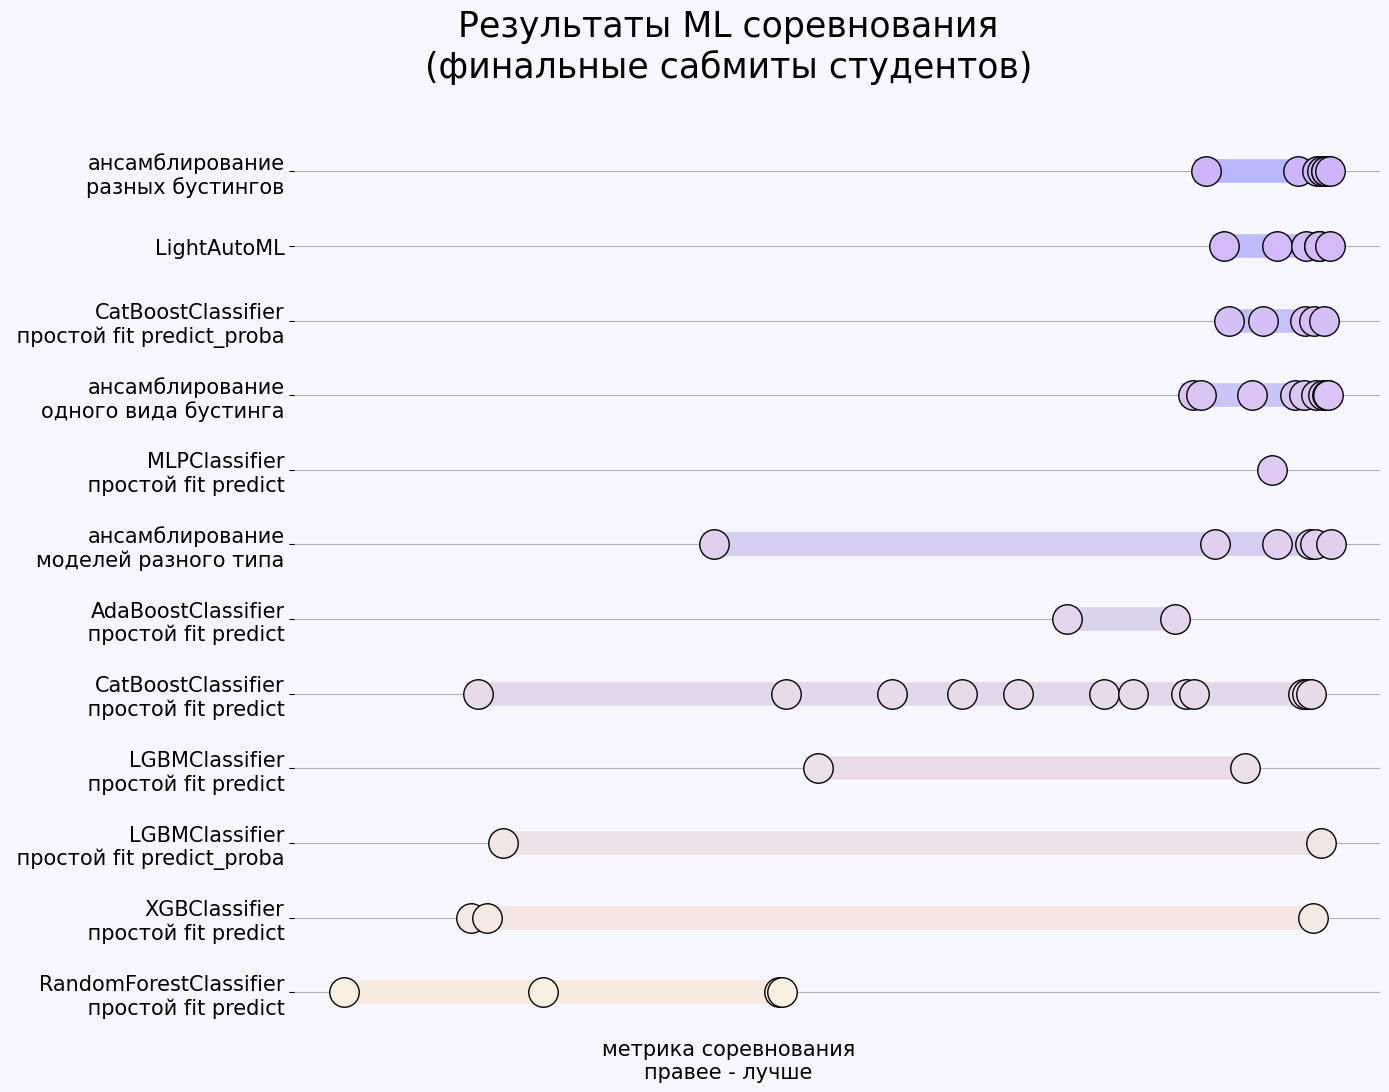

In [15]:
plt.figure(figsize=(14, 11))
min_v = 999
max_v = 0

colors = []
for idx, (k, v) in enumerate(res[::-1]):
    v = sorted(v)
    plt.scatter(
        v, [idx] * len(v), color=cmap_points((idx+1) / len(res)), 
        s=450, zorder=21, edgecolors='black', linewidths=1
    )
    plt.plot(v, [idx] * len(v), color=cmap((idx+1) / len(res)), alpha=1, linewidth=17)

    min_v = min(min_v, min(v))
    max_v = max(max_v, max(v))
    colors.append(cmap((idx+1) / len(res)))
    
    

plt.yticks(range(len(res)), [i[0] for i in res][::-1], color='black', fontsize=15)
plt.grid()
plt.box(False)
plt.xticks([])

plt.xlabel('метрика соревнования\nправее - лучше', fontsize=15, x=0.4, y=1.05)
plt.title('Результаты ML соревнования\n(финальные сабмиты студентов)', fontsize=25, x=0.4, y=1.05)
plt.tight_layout()
# plt.savefig('comp_and_approaches.png', dpi=600)
plt.show()